In [3]:
version = "v2.1.3"

<a id='toc'></a>
# Table of Contents
- **[Assignment 4 Description](#Topic0)**
  - [Task 1 - Import CSV Sensor Data file](#t1)
  - [Task 2 - Standard train_test_split](#t2)
  - [Task 3 - Build a baseline Tree model](#t3)
  - [Task 4 - Baseline Tree model questions](#t4)
  - [Task 5a - A custom train_test_split function](#t5a)
  - [Task 5b - Run a baseline_model](#t5b)
  - [Task 5c - Custom train/test split questions](#t5c)
  - [Task 6 - Confusion Matrix](#t6)
    - [Visualizing the Confusion Matrix](#vcm)
  - [Task 7 - Basic Confusion Matrix Understanding](#t7)
  - [Task 8 - Feature Importance, part 1](#t8)
  - [Task 9 - Feature Importance, part 2](#t9)  
    - [Scores Plot](#scoresplot)
  - [Task 10 - Final project](#t10)
    - [Task 10 Autograder Scoring](#t10ag)

In [1]:
# Either of the following is no longer
# necessary for matplotlib in notebooks.
# The import statement has you covered!

# %matplotlib notebook
# %matplotlib inline

<a id='Topic0'></a>
# Assignment 4 - Tree-based classification & Synthesis Project

### Physiological Sensor Data Analysis (100 points)
This synthesis project is based on a dataset of physiological sensor measurements collected from Smartphone based sensors. The original research sought to determine the particular activity of the subject based on the physiological measurements obtained from wearables and a SmartPhone. The physiological measurements were used to depict the test subject in one of four activities as follows:  
   - neutral
   - emotional
   - mental
   - physical  
 
Your task will be to produce a model that, based on a limited number of features, returns the best possible estimate of the activity being performed by the test subject. While the original analysis utilized more advanced Machine Learning methods, we will concentrate on the supervised learning methods covered in this course.  

The sensor dataset consists of 4480 rows, each with the subject ID, the activity label and 533 measurement features! Each of the 40 test volunteers were subjected to a series of 28 data collection events for each of the four activity types presented above. As you explore this data, you will find that the features are arranged by a particular measurement mode, each consisting of similar statistical values.  
Before we get started, it will be necessary to ingest and prepare our data for training and testing purposes.  

**Notes**  
 - Any available random_state or seed values should be initialized with an integer value of 42.
 - Some standard package imports have been provided below.
 - Additional import deemed necessary for your analysis can be added in the cell following.  
 
 <a href='#toc'>TOC</a>

In [2]:
# Suppress all warnings only when absolutely necessary
# Warnings are in place for a reason!
import warnings

# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')

In [3]:
# useful python standard libraries
import itertools
import math
import random

# import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# helpful SciKit-Learn libraries
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
up, down = True, False

# path/filename to dataset
sensor_data = "assets/sensor_data.csv"

# We will use this variable name multiple times
base_feature_selector = "_mad_"

In [172]:
np.set_printoptions(precision=4)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
## Additional imports can be inlcuded here

<a id='t1'></a>
## Task 1 - Import CSV Sensor Data file (2 points).
 - The first order of business is to read the data file, '_sensor_data.csv_ ', from the '_assets/_ ' folder.
 - Your function should accept zero arguments and return a Pandas DataFrame.
 - Be aware that the activity labels are in a format that may or may not work with your chosen models. If you choose to reassign the activity labels, use the following:  
    - **'neutral' == 1**
    - **'emotional' == 2**
    - **'mental' == 3**
    - **'physical' == 4**  
    
<a href='#toc'>TOC</a>

In [36]:
# hidden autograder codeblock
task_id = "1"

In [6]:
def get_sensor_data():

    df = pd.read_csv('assets/sensor_data.csv')

    # YOUR CODE HERE
    #raise NotImplementedError()

    return df

In [12]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

# get_sensor_data()

In [13]:
# Autograder tests

stu_ans = get_sensor_data()

assert isinstance(
    stu_ans, pd.DataFrame
), "Task 1: Your get_sensor_data function must return a Pandas DataFrame."

assert isinstance(
    stu_ans.iloc[0][2], np.float64
), "Task 1: The dtype of the first row, third column, is incorrect."

# Some hidden tests
del stu_ans

<a id='t2'></a>
## Task 2 - Standard train_test_split (3 points).

 - Our first exercise will be to produce a SciKit-Learn standard train/test split of a dataframe. In the following cell, complete the function that returns a standard train/test split of the sensor data.
   - The function should accept a dataframe as produced by get_sensor_data() and a test_split value which defaults to 0.2.
   - The function should return the standard X_train, X_test, y_train, y_test.  

<a href='#toc'>TOC</a>

In [8]:
# hidden autograder codeblock
task_id = "2"

In [9]:
def std_train_test_split(df, test_split=0.2):
    features = df.iloc[:, 2:]
    label = df.iloc[:, 1]
    X, y = features, label
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_split, random_state = 42)

    # YOUR CODE HERE
    #raise NotImplementedError()

    return X_train, X_test, y_train, y_test

In [16]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

#X_train, X_test, y_train, y_test = std_train_test_split(get_sensor_data(), test_split=0.2)

In [17]:
# Autograder tests
print(f"Task {task_id} - AG tests")
df = get_sensor_data()
stu_ans = std_train_test_split(df)

# print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(stu_ans[0], pd.DataFrame), "Task 2: X_train should be a pd.DataFrame"

assert isinstance(stu_ans[2], pd.Series), "Task 2: y_train should be a pd.Series"

# Some hidden tests
del stu_ans
del df

Task 2 - AG tests


<a id='t3'></a>
## Task 3 - Build a baseline Tree model (5 Points).

- Complete the following function that will establish a baseline score.  
  - This function should retrieve and split the sensor data based on your previously constructed functions. Please use/default to, a split value of 0.2.  
  - Using a _for loop_ or [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp), extract a list of feature names that includes the substring **base_feature_selector** defined in the **[library imports](#library-imports)** cell above.  
  - Create a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) with default hyperparameters and the predetermined random_state value.
    - Train this model on the features as extracted above.  
  - Using the classifier's [score method](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score), score the model using X_test and the previously extracted subset of features.  
  - Finally return a tuple consisting of the list of extracted features and score.  

<a href='#toc'>TOC</a>

In [10]:
# hidden autograder codeblock
task_id = "3"

In [13]:
def baseline_model_one():
    X_train, X_test, y_train, y_test = std_train_test_split(get_sensor_data(), test_split=0.2)
    columns = list(X_train.columns)
    features = [x for x in columns if base_feature_selector in x]
    clf = DecisionTreeClassifier(random_state = 42).fit(X_train[features], y_train)
    score = clf.score(X_test[features], y_test)
    

    # YOUR CODE HERE
    #raise NotImplementedError()

    return (features, score)

In [14]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

baseline_model_one()

(['ECG_original_mad_13',
  'ECG_RR_window_mad_27',
  'ECG_amplitude_RR_mad_41',
  'ECG_HR_min_div_mad_55',
  'ECG_hrv_mad_79',
  'ECG_PSD_mad_93',
  'ECG_p_VFL_mad_107',
  'ECG_p_LF_mad_121',
  'ECG_p_MF_mad_135',
  'ECG_p_HF_mad_149',
  'ECG_p_total_LF_mad_163',
  'IT_Original_mad_187',
  'IT_LF_mad_202',
  'IT_RF_mad_217',
  'IT_BRV_mad_233',
  'IT_PSD_mad_247',
  'IT_VLF_mad_261',
  'IT_LF_mad_275',
  'IT_MF_mad_289',
  'IT_HF_mad_303',
  'IT_p_Total_mad_317',
  'EDA_Original_mad_338',
  'EDA_processed_mad_352',
  'EDA_Filt1_mad_366',
  'EDA_Filt2_mad_380',
  'EDA_Original_mad_442',
  'EDA_processed_mad_456',
  'EDA_Filt1_mad_470',
  'EDA_Filt2_mad_484'],
 0.8314732142857143)

In [23]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = baseline_model_one()
print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(stu_ans, tuple), "Task 3: Your function should return a tuple."

assert isinstance(
    stu_ans[0], list
), "Task 3: Tuple element zero should be a list object."

assert isinstance(
    stu_ans[1], np.float64
), "Task 3: Tuple element one should be a np.float64 value."

# Some hidden tests

del stu_ans

Task 3 - AG tests
Task 3 - your answer:
(['ECG_original_mad_13', 'ECG_RR_window_mad_27', 'ECG_amplitude_RR_mad_41', 'ECG_HR_min_div_mad_55', 'ECG_hrv_mad_79', 'ECG_PSD_mad_93', 'ECG_p_VFL_mad_107', 'ECG_p_LF_mad_121', 'ECG_p_MF_mad_135', 'ECG_p_HF_mad_149', 'ECG_p_total_LF_mad_163', 'IT_Original_mad_187', 'IT_LF_mad_202', 'IT_RF_mad_217', 'IT_BRV_mad_233', 'IT_PSD_mad_247', 'IT_VLF_mad_261', 'IT_LF_mad_275', 'IT_MF_mad_289', 'IT_HF_mad_303', 'IT_p_Total_mad_317', 'EDA_Original_mad_338', 'EDA_processed_mad_352', 'EDA_Filt1_mad_366', 'EDA_Filt2_mad_380', 'EDA_Original_mad_442', 'EDA_processed_mad_456', 'EDA_Filt1_mad_470', 'EDA_Filt2_mad_484'], 0.8314732142857143)


<a id='t4'></a>
## Task 4 - Baseline Tree model questions (3 Points).

1. Does the default accuracy score returned by the model seem reasonable to you; why or why not?
2. What might be the problem with this model or with the data?  

<a href='#toc'>TOC</a>

The default accuracy score seems relatively high for a single decision tree that hasnt been tuned. The model is more accurate when we include all the features. It has a .93 score when all features are included compared to a .83 score with the subset of features. There could be issues with the formatting of the users causing data leakage.

<a id='t5a'></a>
## Task 5a- A custom train_test_split function (10 Points).

 - Because of the nature of the original experiment's data collection methodology, the standard sklearn train_test_split() method cannot be applied successfully to this dataset. 
 - The first significant task will be to create a 'custom_train_test_split()' function that will correctly separate train data from test data, given the structure of the data in the sensor dataset.  
 - Your function should accept two arguments:  
   - A Pandas DataFrame such as returned by your get_sensor_data() function.
   - **Note**, your train and test data should **retain** the 'Subject_ID' column!
     - This is **NOT** a requirement to use the 'Subject_ID' in the model.
   - An integer ___or___ float value that indicates the count or proportion of the **test** data split.
   - In accordance with SciKit-Learn standards, split count determinations should round up.
   - Again, any random_state or seed values should be initialized with an integer value of 42.
 - Helpful Libraries and functions:
   - [numpy.random](https://numpy.org/doc/stable/reference/random/index.html)
     - numpy.random.seed()
     - numpy.random.choice()
   - Python [math](https://docs.python.org/3/library/math.html)  
     - math.ceil()  
  
 - Questions to keep in mind while creating this function:
   - How might this function accept and use an integer or float value for the purpose of dividing the dataset?
   - How do I ensure consistent random selection for reproducibility?
   - Most importantly, how do I split this data to avoid one of the more devastating issues in machine learning?  

<a href='#toc'>TOC</a>

In [24]:
# hidden autograder codeblock
task_id = "5a"

In [15]:
def custom_train_test_split(df, test_split=0.2):
    np.random.seed(42)
    ids = df['Subject_ID']
    unique_id = list(ids.unique())
    if test_split < 1:
        test_amount = math.ceil(test_split*40)
    else:
        test_amount = math.ceil(test_split)
    train_id = list(np.random.choice(unique_id, test_amount))
    mask = df['Subject_ID'].isin(train_id)
    test = df[mask]
    mask_train = ~df['Subject_ID'].isin(train_id)
    train =  df[mask_train]
    X_test = test.drop(test.columns[1], axis=1)
    X_train = train.drop(train.columns[1], axis=1)
    y_test = test.iloc[:, 1]
    y_train = train.iloc[:, 1]
    

    # YOUR CODE HERE
    #raise NotImplementedError()

    return X_train, X_test, y_train, y_test

In [16]:
# use this cell to explore your solution


def test_my_code():
    test_split = 5
    df = get_sensor_data()

    X_train, X_test, y_train, y_test = custom_train_test_split(
        df, test_split=test_split
    )

    print(f"{df.shape[0]}, {X_train.shape[0]}, {X_test.shape[0]}")

    # insert additional code as necessary to complete your testing

    return


# Remember to comment the following function call before submitting the notebook.

# test_my_code()

In [17]:
# Autograder tests
print(f"Task {task_id} - AG tests")

test_split = 5
df = get_sensor_data()

stu_ans = custom_train_test_split(df, test_split)

# print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(stu_ans[0], pd.DataFrame), "Task 5a: X_train should be a pd.DataFrame"

assert isinstance(stu_ans[2], pd.Series), "Task 5a: y_train should be a pd.Series"

# Some hidden tests

del stu_ans

Task 3 - AG tests


<a id='t5b'></a>
## Task 5b - Run a baseline_model using your custom data splitter
- Copy/Paste your baseline model code from above into the function below.  
  - Replace the std_train_test_split() function with your new custom_train_test_split().
    - Use the default split of 0.2.
  - Run this revised function and answer the questions below.  

<a href='#toc'>TOC</a>

In [28]:
# hidden autograder codeblock
task_id = "5b"

In [18]:
def baseline_model_two():
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_split=0.2)
    columns = list(X_train.columns)
    features = [x for x in columns if base_feature_selector in x]
    clf = DecisionTreeClassifier(random_state = 42).fit(X_train[features], y_train)
    score = clf.score(X_test[features], y_test)

    # YOUR CODE HERE
    #raise NotImplementedError()

    return (features, score)

In [30]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

# baseline_model_two()

In [31]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = baseline_model_two()

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(stu_ans, tuple), "Task 5b: Your function should return a tuple."

assert isinstance(
    stu_ans[0], list
), "Task 5b: Tuple element zero should be a list object."

assert isinstance(
    stu_ans[1], np.float64
), "Task 5b: Tuple element one should be a np.float64 value."


del stu_ans

Task 5b - AG tests
Task 5b - your answer:
(['ECG_original_mad_13', 'ECG_RR_window_mad_27', 'ECG_amplitude_RR_mad_41', 'ECG_HR_min_div_mad_55', 'ECG_hrv_mad_79', 'ECG_PSD_mad_93', 'ECG_p_VFL_mad_107', 'ECG_p_LF_mad_121', 'ECG_p_MF_mad_135', 'ECG_p_HF_mad_149', 'ECG_p_total_LF_mad_163', 'IT_Original_mad_187', 'IT_LF_mad_202', 'IT_RF_mad_217', 'IT_BRV_mad_233', 'IT_PSD_mad_247', 'IT_VLF_mad_261', 'IT_LF_mad_275', 'IT_MF_mad_289', 'IT_HF_mad_303', 'IT_p_Total_mad_317', 'EDA_Original_mad_338', 'EDA_processed_mad_352', 'EDA_Filt1_mad_366', 'EDA_Filt2_mad_380', 'EDA_Original_mad_442', 'EDA_processed_mad_456', 'EDA_Filt1_mad_470', 'EDA_Filt2_mad_484'], 0.5727040816326531)


<a id='t5c'></a>
## Task 5c - Custom train/test split questions (2 Points).

1. Is the score of the model that incorporates custom_train_test_split() significantly different from the std_train_test_split() version?  
2. What issue(s) have we eliminated with our new custom_train_test_split() function?  

<a href='#toc'>TOC</a>

The model is performing significantly worse than it did using the std_train_test_split(). This is because we eliminated the data leakage that was occuring by allowing teh same user to have rowsa in the test set and the train set. 

<a id='t6'></a>
## Task 6 - Confusion Matrix (5 Points).

 - We now want to better understand the relationship of correct and incorrect predictons made by a classification model. A very useful tool for examining a multiclass outcome, such as we have with our sensor dataset, is the [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
 - Using the SciKit-Learn [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) model, create a function that returns a Confusion Matrix.
   - Your function should accept zero arguments.  
   - Set hyperparameter: max_iter=1000
   - Any random_state or seed values should be initialized with an integer value of 42.
 - Use your previously defined functions to derive your train and test sets.
 - Scaling is an important factor in many Machine Learning projects (See section 3.3 in the course textbook). For the current dataset, use the sklearn method StandardScaler() to scale the train and test sets.
 - Using code that you had previously developed, include all features who's name includes the substring defined in 
**base_feature_selector** ([library imports](#library-imports)).
- Your function should return the following tuple:  
   - The confusion matrix array as returned by the sklean method confusion_matrix().  

<a href='#toc'>TOC</a>

In [ ]:
# hidden autograder codeblock
task_id = "6"

In [19]:
def LR_confusion_matrix():
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_split=0.2)
    scaler = StandardScaler()
    columns = list(X_train.columns)
    features = [x for x in columns if base_feature_selector in x]
    X_train = X_train[features]
    X_test = X_test[features]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_scaled, y_train)
    X_predict = clf.predict(X_test_scaled)
    conf_matrix = confusion_matrix(y_test, X_predict)
    
    
   

    # YOUR CODE HERE
    #raise NotImplementedError()

    return conf_matrix

In [39]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

#LR_confusion_matrix()

(array([[ 68,  61,   0,  67],
        [ 70,  71,   0,  55],
        [ 27,  52,  82,  35],
        [  5,  27,   0, 164]]),
 0.49107142857142855)

In [35]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = LR_confusion_matrix()

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert isinstance(
    stu_ans, np.ndarray
), "Task 6: The second tuple element should be an np.ndarray"


del stu_ans

Task 5b - AG tests
Task 5b - your answer:
[[ 68  61   0  67]
 [ 70  71   0  55]
 [ 27  52  82  35]
 [  5  27   0 164]]


<a id='vcm'></a>
## Visualizing the Confusion Matrix
<a href='#toc'>TOC</a>

In [20]:
def plot_confusion():
    cm = LR_confusion_matrix()
    labels = {"neutral": 1, "emotional": 2, "mental": 3, "physical": 4}.keys()
    display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    display_cm.plot()
    plt.show()

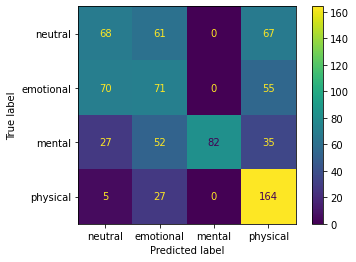

In [37]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

plot_confusion()

<a id='t7'></a>
## Task 7 - Basic Confusion Matrix Understanding (5 Points).

 - Answer the following questions concerning the above Confusion Matrix.  
 - Record (hardcode) your answers in the answer variables in the cell below for autograding purposes.  
 - Your answers should use the Python types **int**, **float**, or **str** as appropriate.
 
Q1. What is the number of __Correctly Predicted__ for the _mental_ activity?  
Q2. How many __False Positive__ predictions were made for the _neutral_ activity?  
Q3. How many __False Negative__ predictions were made for the _physical_ activity?  
Q4. What is the __Precision__ Score for the _mental_ activity? (round to three decimal places)  
Q5. What is the __Recall__ Score for the _emotional_ activity? (round to three decimal places)  
Q6. What is the overall __Accuracy__ for the current model? (round to three decimal places)  
Q7. Which activity is most confused for _mental_ activity when not?  

<a href='#toc'>TOC</a>

In [ ]:
# hidden autograder codeblock
task_id = "7"

In [21]:
# Supply your answers to Q1 through Q7
# in variables a1 through a7.


def confusion_matrix_questions():

    a1 = 82
    a2 = 102
    a3 = 32
    a4 = 82/82
    a5 = round(71/196,3)
    a6 = round(0.49107142857142855,3)
    a7 = 'neutral'

    # YOUR CODE HERE
    #raise NotImplementedError()

    return (a1, a2, a3, a4, a5, a6, a7)

In [22]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = confusion_matrix_questions()

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert (
    len(stu_ans) == 7
), "Task 7: Your answer tuple does not contain the correct number of answers."
assert isinstance(stu_ans[0], int), "Task 7: Answer one should be an integer"
assert isinstance(stu_ans[1], int), "Task 7: Answer two should be an integer"
assert isinstance(stu_ans[2], int), "Task 7: Answer three should be an integer"
assert isinstance(stu_ans[3], float), "Task 7: Answer four should be a float"
assert isinstance(stu_ans[4], float), "Task 7: Answer five should be a float"
assert isinstance(stu_ans[5], float), "Task 7: Answer six should be a float"
assert isinstance(stu_ans[6], str), "Task 7: Answer seven should be a string"


del stu_ans

Task 3 - AG tests
Task 3 - your answer:
(82, 102, 32, 1.0, 0.362, 0.491, 'neutral')


<a id='t8'></a>
## Task 8 - Feature Importance, part 1 (5 Points).
#### Now we want to explore how some models are able to provide additional insight into the features that played a prominent role in the estimation outcome.
 - Produce a function that implements a RandomForestClassifier model, which includes the [**feature_importances_**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) attribute.
- The function accepts a single argument for the top X number of features, the default value will be 10.
  - The classifier should use only two parameters:
    - random_state=42
    - n_jobs=-1
- Use your previously defined functions to derive your train and test sets.
- Using code that you had previously developed, include all features who's name includes the substring defined by **base_feature_selector** ([library imports](#library-imports)).
 - The function should return a tuple of two elements.
   - The first element will be a **sorted** list of tuples in the form **\[('feature_name', importance_value),...\]**. The list of tuples should be sorted in descending order.
     - This list of tuples should be sorted in **descending order** of feature_importance.
   - The second element (test data score) should be an np.float64 value.  

<a href='#toc'>TOC</a>

In [27]:
# hidden autograder codeblock
task_id = "8"

In [173]:
def get_top_features(top=10):
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_split=0.2)
    columns = list(X_train.columns)
    features = [x for x in columns if base_feature_selector in x]
    X_train = X_train[features]
    X_test = X_test[features]
    clf = RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    importance = list(clf.feature_importances_)
    tuple_list = []
    for i,item in enumerate(importance):
        tuple_list.append((features[i],importance[i]))
    top_x = sorted(tuple_list, key=lambda x: x[1], reverse=True)
    

    # YOUR CODE HERE
    #raise NotImplementedError()

    return top_x[:top], score

In [174]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

get_top_features()

([('IT_Original_mad_187', 0.113324672271813),
  ('IT_LF_mad_202', 0.09616450244880041),
  ('IT_RF_mad_217', 0.07129356671824066),
  ('ECG_original_mad_13', 0.0681501351841329),
  ('ECG_amplitude_RR_mad_41', 0.056582143969032994),
  ('IT_p_Total_mad_317', 0.0450656073059221),
  ('EDA_processed_mad_456', 0.041855793830785686),
  ('IT_PSD_mad_247', 0.04057596959789773),
  ('ECG_RR_window_mad_27', 0.036839827826773086),
  ('ECG_HR_min_div_mad_55', 0.036048175056046704)],
 0.5446428571428571)

In [175]:
# Autograder tests
print(f"Task {task_id} - AG tests")
stu_ans = get_top_features()

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert (
    len(stu_ans) == 2
), "Task 8: Your answer tuple does not contain the correct number of elements."

assert isinstance(stu_ans[0], list), "Task 9: The first tuple element should be a list"

assert (
    len(stu_ans[0]) == 10
), "Task 9: The default number of top features is not correct."

assert isinstance(
    stu_ans[1], np.float64
), "Task 9: get_top_features() second return element should be an np.float64."

del stu_ans

# Some hidden tests

Task 8 - AG tests
Task 8 - your answer:
([('IT_Original_mad_187', 0.113324672271813), ('IT_LF_mad_202', 0.09616450244880041), ('IT_RF_mad_217', 0.07129356671824066), ('ECG_original_mad_13', 0.0681501351841329), ('ECG_amplitude_RR_mad_41', 0.056582143969032994), ('IT_p_Total_mad_317', 0.0450656073059221), ('EDA_processed_mad_456', 0.041855793830785686), ('IT_PSD_mad_247', 0.04057596959789773), ('ECG_RR_window_mad_27', 0.036839827826773086), ('ECG_HR_min_div_mad_55', 0.036048175056046704)], 0.5446428571428571)


<a id='t9'></a>
## Task 9 - Feature Importance, part 2 (10 Points).

#### The value of Feature Importance 
- This follow-on task will use the same **RandomForestClassifier** model as in your get_top_features() function.
- The new model will use a portion of the output returned by the get_top_features() function.
- Use the previously defined functions to derive your train and test datasets.
- Create a loop that trains your model with an incrementally increasing number of features from the top features list.
  - The first pass will include the topmost important feature, the second pass will include the top two most important features and so on until the final pass of all top X features.
- Your function should return a list of feature-based test data scores produced by the model.  

<a href='#toc'>TOC</a>

In [176]:
# hidden autograder codeblock
task_id = "1"

In [177]:
def score_top_features(top=10):
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_split=0.2)
    columns = list(X_train.columns)
    features = [x for x in columns if base_feature_selector in x]
    X_train_feat = X_train[features]
    X_test_feat = X_test[features]
    clf = RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train_feat, y_train)
    score = clf.score(X_test_feat,y_test)
    importance = list(clf.feature_importances_)
    tuple_list = []
    for i,item in enumerate(importance):
        tuple_list.append((features[i],importance[i]))
    top_x = sorted(tuple_list, key=lambda x: x[1], reverse=True)
    top_x = top_x[:top]
    scores = []
    temp_features =[]
    for item in top_x:
        temp_features.append(item[0])
        clf = RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train[temp_features], y_train)
        score = clf.score(X_test_feat[temp_features],y_test)
        scores.append(score)
        

    # YOUR CODE HERE
    #raise NotImplementedError()

    return scores

In [178]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

# score_top_features()

In [179]:
# Autograder tests
print(f"Task {task_id} - AG tests")
top = 10
stu_ans = score_top_features(top)

print(f"Task {task_id} - your answer:\n{stu_ans}")

assert (
    len(stu_ans) == top
), "Task 9: Your function does not return the correct number of scores."

assert all(
    isinstance(x, np.float64) for x in stu_ans
), "Task 9: One or more of the returned scores is of an incorrect type."


del stu_ans

Task 1 - AG tests
Task 1 - your answer:
[0.39413265306122447, 0.43112244897959184, 0.44387755102040816, 0.44387755102040816, 0.45663265306122447, 0.5510204081632653, 0.5357142857142857, 0.5612244897959183, 0.5752551020408163, 0.5956632653061225]


<a id='scoresplot'></a>
## Scores Plot
The plot_scores() function accepts top X features argumnet which defaults to a value of 10. Feel free to change the argument to better see how accuracy is affected by the number of top features used to train the model.  

<a href='#toc'>TOC</a>

In [ ]:
def plot_scores(top=10):

    if top > 29:
        top = 29

    top_x_features, score = get_top_features(top)
    scores = score_top_features(top)

    importance_scores = [score[1] for score in top_x_features]
    x_axis = np.arange(1, len(scores) + 1)

    plt.figure(figsize=(8, 6))

    plt.xticks(x_axis)
    plt.ylim([0, max(score, max(importance_scores)) + 0.05])
    plt.xlabel("Number of Top 10 Features Used")
    plt.ylabel("Score Value")
    plt.grid(alpha=0.25)

    plt.plot(x_axis, scores, label="Accuracy Score", c="g", linestyle="solid")

    plt.plot(
        x_axis,
        importance_scores,
        label="Feature Importance Scores",
        c="r",
        linestyle="solid",
    )

    plt.axhline(
        score,
        label=f"All '{base_feature_selector}' features score",
        c="b",
        linestyle="dashed",
    )

    plt.legend()
    plt.tight_layout()

    return

In [ ]:
# Plot accuracy vs feature importance
# the plot_scores() function accepts an optional top N parameter.
# Remember to comment the following function call before submitting the notebook.

# plot_scores()

<a id='t10'></a>
## Task 10 - Final project (50 Points).

- The final task for this assignment is open-ended with only a few **constraints**. Using any of the Supervised Machine Learning techniques and models presented in this course, produce a model that produces a best-possible ROC-AUC score. Your Task 10 award points will be evaluated solely on this score. The primary constraint for this task is that you will be able to utilize not more than **10** of the 533 available data features in the training and scoring of your model. A quick calculation of the number of available combinations C(n, r) = C(533, 10) = $\frac{n!}{r!(n-r)!}$ = 4.684e20. That is very large number of possible combinations (the number of permutations is even greater)! Because of the intractability of checking all possible 10-feature combinations, it will be necessary to devise a scheme whereby your algorithm makes a selection of features and scores that selection. Be creative but also efficient in your feature selection process; this may well mean computational efficiency. Attempting to examine too many features at one time can be computationally very expensive! Because multiple feature selection cycles may be necessary, you will also need to develop an efficient method of keeping track of the top model, features, and score.  

- Why would we want to limit the number of features? 
   1. The creator of the project may want to minimize the number of sensors/measurements required to move the project forward.
   2. The final product will be used on a smartphone where resource consumption is always a concern.
   3. Computational resource availability of the development environment could be constrained due to budget availability.
   4. The development environment may be intentionally constrained to mimic the production environment.
  
- You will find that even with these limitations, some model choices will still consume significant resources, even to the point of crashing the Python kernel!  

- The activity_model() function:
  - Arguments: none
  - Use your previously defined functions to derive your train and test sets.
  - If feasible, expand upon your previously created feature selection code.
  - Use the following parameters when establishing your [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) method:
    - average="macro"
    - multi_class="ovr"
  - return: a tuple consisting of (fit_model, feature_list, roc_auc_score)  

<a href='#toc'>TOC</a>

In [ ]:
# hidden autograder codeblock
task_id = "10"

In [169]:
def activity_model():
    
    # Used the comment block  below to find the important features, then I found that the features that started with IT 
    # were having the biggest impact along with the GradientBoostingClassifier. So I ran a large random test on the best 50 starting with It to find the specific set of best
    # 10 that were used at the bottom. Then optimized that best 10. 
    import random
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import roc_auc_score
    X_train, X_test, y_train, y_test = custom_train_test_split(get_sensor_data(), test_split=0.2)
    X_train = X_train.iloc[:,1:]
    X_test = X_test.iloc[:,1:]
    columns = list(X_train.columns)
    features = [x for x in columns if x.startswith('IT')]
    temp = RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train[features], y_train)
    score = temp.score(X_test[features],y_test)
    importance = list(temp.feature_importances_)
    tuple_list = []
    for i,item in enumerate(importance):
        tuple_list.append((X_train[features].columns[i],importance[i]))
    top_x = sorted(tuple_list, key=lambda x: x[1], reverse=True)
    top_features = top_x[:50]
    top_features_only = [val[0] for val in top_features]


    
    '''
    # List to store the results
    results = []
    random.seed(42)
    # Loop through 10 sets of 10 randomly chosen features
    for i in range(50):
        # Choose 10 random features
        features = random.sample(top_features_only, 10)

        # Create and train the Decision Tree model
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train[features], y_train)

        # Make predictions on the test set
        y_pred = model.predict_proba(X_test[features])

        # Calculate and store the ROC-AUC score
        score = roc_auc_score(y_test, y_pred,average="macro", multi_class="ovr")
        results.append((features, model, score))

        # Repeat the process for the Random Forest, Gradient Boosting, KNN, and SVM models
        model = RandomForestClassifier(random_state=42,n_jobs=-1)
        model.fit(X_train[features], y_train)
        y_pred = model.predict_proba(X_test[features])
        score = roc_auc_score(y_test, y_pred,average="macro", multi_class="ovr")
        results.append((features, model, score))

        model = GradientBoostingClassifier(random_state=42)
        model.fit(X_train[features], y_train)
        y_pred = model.predict_proba(X_test[features])
        score = roc_auc_score(y_test, y_pred,average="macro", multi_class="ovr")
        results.append((features, model, score))

        model = KNeighborsClassifier()
        model.fit(X_train[features], y_train)
        y_pred = model.predict_proba(X_test[features])
        score = roc_auc_score(y_test, y_pred,average="macro", multi_class="ovr")
        results.append(( model,features,score))
        highest_tuple = max(results, key=lambda t: t[2])
    '''
        # YOUR CODE HERE
        # List to store the results
    results = []
    random.seed(42)
    # Loop through 10 sets of 10 randomly chosen features
    # Choose 10 random features
    features = ['IT_LF_mean_190',
       'IT_RF_baseline_218',
       'IT_RF_std_206',
       'IT_VLF_baseline_262',
       'IT_LF_std_191',
       'IT_Original_min_182',
       'IT_VLF_median_252',
       'IT_VLF_max_255',
       'IT_RF_Area_219',
       'IT_RF_skewness_209']

    model = GradientBoostingClassifier(random_state=42, max_depth =4,learning_rate = 0.2, n_estimators = 250)
    model.fit(X_train[features], y_train)
    y_pred = model.predict_proba(X_test[features])
    score = roc_auc_score(y_test, y_pred,average="macro", multi_class="ovr")
    results.append(( model, features,score))
    highest_tuple = max(results, key=lambda t: t[2])

        #raise NotImplementedError()

    return highest_tuple

In [163]:
# use this cell to explore your solution
# Remember to comment the following function call before submitting the notebook.

activity_model()

(['IT_LF_mean_190',
  'IT_RF_baseline_218',
  'IT_RF_std_206',
  'IT_VLF_baseline_262',
  'IT_LF_std_191',
  'IT_Original_min_182',
  'IT_VLF_median_252',
  'IT_VLF_max_255',
  'IT_RF_Area_219',
  'IT_RF_skewness_209'],
 GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=250,
                            random_state=42),
 0.8901347528807441)

<a id='t10ag'></a>
## Task 10 Autograder Scoring
<a href='#toc'>TOC</a>

In [170]:
# Hidden autograder model validation
# test for AUC score >= 0.83

print(f"Task {task_id} - AG tests")
stu_ans = activity_model()

print(f"Task {task_id} - your answer:\n{stu_ans}")


assert (
    stu_ans[2] >= 0.83
), f"Task 10: Your test AUC {stu_ans[2]:.4f} is less than 0.83. You will not receive any points for this task."

Task 8 - AG tests
Task 8 - your answer:
(GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=250,
                           random_state=42), ['IT_LF_mean_190', 'IT_RF_baseline_218', 'IT_RF_std_206', 'IT_VLF_baseline_262', 'IT_LF_std_191', 'IT_Original_min_182', 'IT_VLF_median_252', 'IT_VLF_max_255', 'IT_RF_Area_219', 'IT_RF_skewness_209'], 0.8901347528807441)


In [165]:
# autograder test - AUC >= 0.85


assert (
    stu_ans[2] >= 0.85
), f"Task 10: Your test AUC {stu_ans[2]:.4f} is less than 0.85. You will receive 25 points for this task."

In [166]:
# autograder test - AUC >= 0.87


assert (
    stu_ans[2] >= 0.87
), f"Task 10: Your test AUC {stu_ans[2]:.4f} is less than 0.87. You will receive 30 points for this task."

In [167]:
# autograder test - AUC >= 0.89


assert (
    stu_ans[2] >= 0.89
), f"Task 10: Your test AUC {stu_ans[2]:.4f} is less than 0.89. You will receive 35 points for this task."

In [168]:
# autograder test - AUC >= 0.91


assert (
    stu_ans[2] >= 0.91
), f"Task 10: Your test AUC {stu_ans[2]:.4f} is less than 0.91. You will receive 45 points for this task."

del stu_ans

AssertionError: Task 10: Your test AUC 0.8901 is less than 0.91. You will receive 45 points for this task.

<a href='#toc'>TOC</a>